#### Sigmoid, Relu 성능비교

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

In [3]:
# 지역해 방지
batch_size = 50

In [4]:
# 가중치는 반드시 초기화 되어야 함
a1 = tf.Variable(tf.random_normal(shape=[1,1])) # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1])) 
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))

In [5]:
# 데이터 생성
x = np.random.normal(2,0.1,500) # 평균 2, 표준편차 0.1, n 500

In [6]:
# none  1차원 이지만, 여러개가 들어올 수 있음
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [7]:
# 0-1 확률값으로 매핑 (예측값)
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1)) # y = ax + b
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [8]:
# loss function: mse
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [9]:
# 가중치 초기화
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
# learning rate
my_opt = tf.train.GradientDescentOptimizer(0.01)

# 트레인 
train_step_sigmoid = my_opt.minimize(loss1) #미분 수행. 가중치 수정
train_step_relu = my_opt.minimize(loss2)

print('\n Sigmoid and Relu 함수의 최적화 0.75')


 Sigmoid and Relu 함수의 최적화 0.75


sigmoid = 0.12655206            relu=2.0227606
sigmoid = 0.17863758            relu=0.7530296
sigmoid = 0.24769813            relu=0.7492897
sigmoid = 0.3446748            relu=0.7499546
sigmoid = 0.4400661            relu=0.7539999
sigmoid = 0.5236898            relu=0.754772
sigmoid = 0.58373857            relu=0.7508698
sigmoid = 0.62733483            relu=0.7470234
sigmoid = 0.6549499            relu=0.75180537
sigmoid = 0.67452586            relu=0.75470716


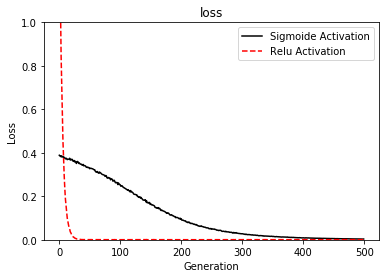

In [11]:
loss_vec_sigmoid = []
loss_vec_relu = []

for i in range(500): # epoch 500, batch size가 500번 돈다
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict= {x_data:x_vals})
    sess.run(train_step_relu, feed_dict = {x_data:x_vals})
    
    # loss 값 변화 저장
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict = {x_data:x_vals}))
    
    if i%50 == 0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + '            ' + 'relu=' + str(np.mean(relu_output)))
        
plt.plot(loss_vec_sigmoid, 'k-', label= 'Sigmoide Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0,1.0])
plt.title('loss')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()